**В ноутбуке пощупаем данные из витрины,**

**ответим на несколько вопросов и сделаем несложную визуализацию**

###### Импорты и функции

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from connection import cursor

In [145]:
def vis(data, y, x):
    fig, ax = plt.subplots(figsize=(6 , 3))
    ax = sns.barplot(data, x=x, y=y, hue=y)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

##### Визуализация

In [146]:
cursor.execute(
    '''
    SELECT "name", revenue
    FROM revenue_mart
    '''
)

unit_revenue = pd.DataFrame(cursor.fetchall(), columns=['name', 'revenue'])
unit_revenue.sort_values(by='revenue', ascending=False, inplace=True)

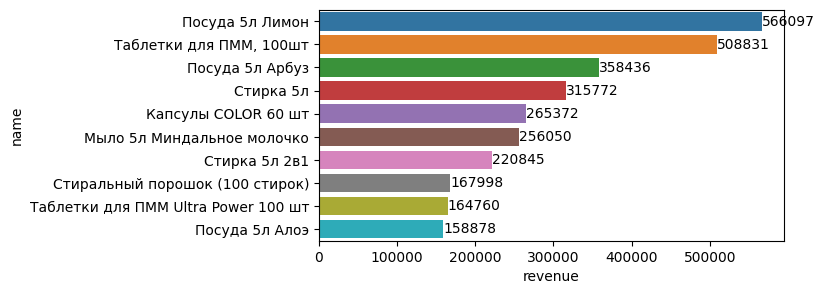

In [147]:
vis(unit_revenue.head(10), 'name', 'revenue')

Товар, принесший больше всего выручки: средство для мытья посуды 5л лимон c 566 тысячами.

In [148]:
cursor.execute(
    '''
    SELECT "name", position_category
    FROM revenue_mart
    '''
)

position = pd.DataFrame(cursor.fetchall(), columns=['name', 'position_category'])
position.sort_values(by='position_category', ascending=False, inplace=True)

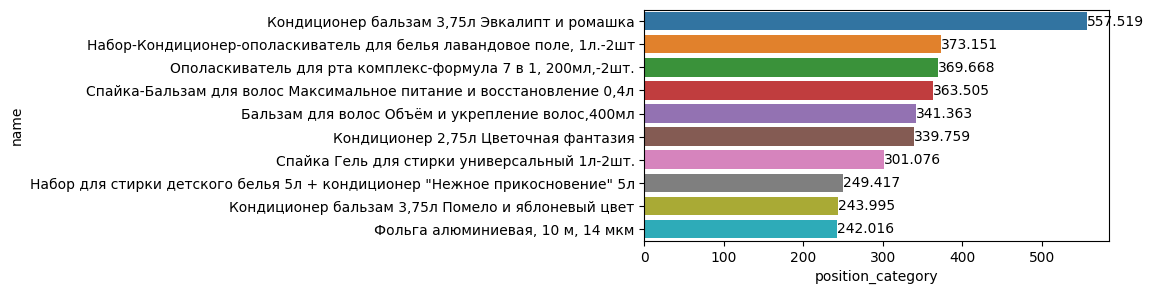

In [149]:
vis(position.head(10), 'name', 'position_category')

Лучшая позиция в поиске, которая, по всей видимости является весом при ранжировании, а не самим рангом, у кондиционера-бальзама 3.75л с запахом эвкалипта и ромашки.

In [150]:
cursor.execute(
    '''
    SELECT category, SUM(revenue)
    FROM revenue_mart
    GROUP BY category
    '''
)

category_revenue = pd.DataFrame(cursor.fetchall(), columns=['category', 'revenue'])
category_revenue.sort_values(by='revenue', ascending=False, inplace=True)

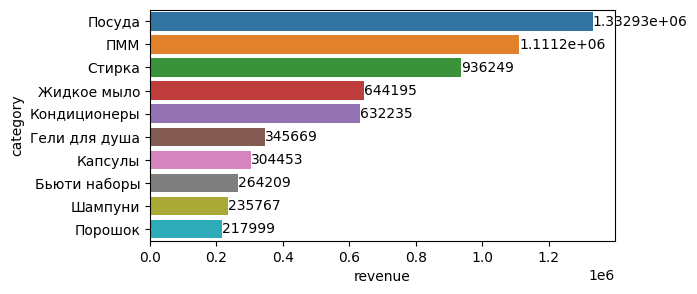

In [151]:
vis(category_revenue.head(10), 'category', 'revenue')

Наибольшая выручка, аггрегированная по группе, у средств для мытья посуды: более 1.3 млн.

In [153]:
cursor.execute(
    '''
    SELECT category, SUM(ordered_units)
    FROM revenue_mart
    GROUP BY category
    '''
)

category_orders = pd.DataFrame(cursor.fetchall(), columns=['category', 'ordered_units'])
category_orders.sort_values(by='ordered_units', ascending=False, inplace=True)

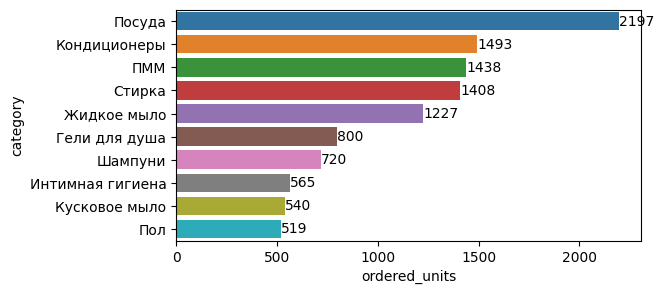

In [154]:
vis(category_orders.head(10), 'category', 'ordered_units')

Лучшие продажи по категориям не в рублях, а в штуках так же у средств для мытья посуды с сильным отрывом.

Эта же тенденция наблюдалась и в выборках по товарам: средства для мыться посуды дважды встречались в топ-3 по выручке.